# Deep Learning


### 1. DNN(Deep Neural Network)

In [ ]:
# 최초의 neural network perceptron

# Module import
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

x_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]], dtype=np.float32)

# AND GATE에 대한 연산
# t_data = np.array([[0], [0], [0], [1]], dtype=np.float32)

# OR GATE에 대한 연산
# t_data = np.array([[0], [1], [1], [1]])

# XOR GATE에 대한 연산
t_data = np.array([[0], [1], [1], [0]])

model = Sequential()

model.add(Flatten(input_shape=(2,)))
model.add(Dense(units=1,
                activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='binary_crossentropy',
              metrics=['acc'])

model.fit(x_data,
          t_data,
          epochs=10000,
          verbose=0)

print(f'정확도는: {model.evaluate(x_data, t_data)}')
# [0.0004125348059460521, 1.0] => AND 연산
# [0.00021592674602288753, 1.0] => OR 연산
# [0.6931471824645996, 0.5] => XOR 연산, 분류가 잘 되지 않음

1/1 [==============================] - 0s 169ms/step - loss: 0.6931 - acc: 0.5000
정확도는: [0.6931471824645996, 0.5]


In [ ]:
# Backpropagation 기법을 적용하여 다중 layer 구성하면 분류 가능
# 위의 XOR 문제를 해결하기 위한 다중 layer perceptron

# Module import
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

x_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]], dtype=np.float32)

# XOR GATE에 대한 연산
t_data = np.array([[0], [1], [1], [0]])

# Model
model = Sequential()

# Input Layer
model.add(Flatten(input_shape=(2,)))

# 여러 개의 Hidden Layer
# Hidden Layer는 Dense layer를 사용
model.add(Dense(units=10,
                activation='sigmoid'))

model.add(Dense(units=6,
                activation='sigmoid'))

# Output Layer
model.add(Dense(units=1,
                activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='binary_crossentropy',
              metrics=['acc'])

model.fit(x_data,
          t_data,
          epochs=10000,
          verbose=0)

print(f'정확도는: {model.evaluate(x_data, t_data)}')
# 정확도는: [1.984002665267326e-06, 1.0] => XOR에 대한 연산

1/1 [==============================] - 0s 207ms/step - loss: 1.9840e-06 - acc: 1.0000
정확도는: [1.984002665267326e-06, 1.0]


- 아주 복잡한 문제를 해결하기 위해서는 Layer와 Layer 안의 node 수를 증가시키면 해결 가능
    - 많은 Layer를 사용할 경우
    - Vanishing Gradient 현상 발생

- Vanishing Gradient 해결 방법
    - weight 초기화 -> keras에 구현
    - ReLU 함수 사용


##### 1-1. ReLU

In [ ]:
# Hidden Layer의 activation 에 ReLU(Rectified Linear Unit) 함수 사용
# 입력이 양수이면 그대로, 음수이면 0을 반환

# Module import
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

x_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]], dtype=np.float32)

# XOR GATE에 대한 연산
t_data = np.array([[0], [1], [1], [0]])

# Model
model = Sequential()

# Input Layer
model.add(Flatten(input_shape=(2,)))

# 여러 개의 Hidden Layer
# Hidden Layer는 Dense layer를 사용
model.add(Dense(units=10,
                activation='relu'))

model.add(Dense(units=6,
                activation='relu'))

# Output Layer
model.add(Dense(units=1,
                activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='binary_crossentropy',
              metrics=['acc'])

model.fit(x_data,
          t_data,
          epochs=10000,
          verbose=0)

print(f'정확도는: {model.evaluate(x_data, t_data)}')
# 정확도는: [1.984002665267326e-06, 1.0] => XOR에 대한 연산

# 실습 구현
- MNIST 데이터셋
- Logistic Regression으로 구현
- Deep Network로 구현

### 2-1. Logistic Regression

In [ ]:
%reset

# Module import
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf

# Raw Data Loading
data = r'/content/drive/MyDrive/LikeLion/ML/data/mnist/train.csv'
df_mnist = pd.read_csv(data)
display(df_mnist)

# feature, target 분할
x_data = df_mnist.drop('label', axis=1, inplace=False).values
t_data = df_mnist['label'].values # 원래 one-hot 처리를 해야 함
                                  # 하지만 keras에게 위임할 수 있어서 따로 처리x

# Normalization
scaler = MinMaxScaler()
x_data_norm = scaler.fit_transform(x_data)

# train, test 분할
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = train_test_split(x_data_norm,
                                                                                  t_data,
                                                                                  stratify=t_data,
                                                                                  test_size=0.3,
                                                                                  random_state=0)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 일반 Regression Model
model = Sequential()

# Layers
model.add(Flatten(input_shape=(784,)))
model.add(Dense(units=10,
                activation='softmax'))

# Compile
model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='sparse_categorical_crossentropy',  # one-hot 처리하지 않은 t_data 처리
              metrics=['acc'])

# 학습
model.fit(x_data_train_norm,
          t_data_train,
          epochs=100,
          batch_size=100,  # 데이터가 큰 경우 잘라서 불러오기
          verbose=0,
          validation_split=0.2)

# Eval
print(model.evaluate(x_data_test_norm,
                     t_data_test))
# [0.5128799676895142, 0.9019841551780701]

394/394 [==============================] - 1s 2ms/step - loss: 0.5129 - acc: 0.9020
[0.5128799676895142, 0.9019841551780701]


In [ ]:
pred = tf.argmax(model.predict(x_data_test_norm), axis=1).numpy()
print(classification_report(t_data_test, pred))

394/394 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1240
           1       0.95      0.97      0.96      1405
           2       0.92      0.84      0.88      1253
           3       0.87      0.89      0.88      1305
           4       0.92      0.90      0.91      1222
           5       0.88      0.82      0.85      1139
           6       0.91      0.96      0.93      1241
           7       0.91      0.93      0.92      1320
           8       0.83      0.88      0.85      1219
           9       0.88      0.88      0.88      1256

    accuracy                           0.90     12600
   macro avg       0.90      0.90      0.90     12600
weighted avg       0.90      0.90      0.90     12600



### 2-2. Deep Network(Deep Learning)

In [ ]:
# Deep Network 구현
dn_model = Sequential()

# Layers
# Input Layer
dn_model.add(Flatten(input_shape=(784,)))

# Hidden Layer
dn_model.add(Dense(units=256,
                activation='relu'))

dn_model.add(Dense(units=128,
                activation='relu'))

# Output Layer
dn_model.add(Dense(units=10,
                activation='softmax'))

# Compile
dn_model.compile(optimizer=Adam(learning_rate=1e-2),
                  loss='sparse_categorical_crossentropy',
                  metrics=['acc'])

# Early Stopping Callback
from tensorflow.keras.callbacks import EarlyStopping

# monitor: 조기 종료의 기준, 일반적으로 val_loss를 기반으로 설정
# patience: loss값이 증가하는 것에 대한 허용 개수
#           연속적으로 개수를 세고 성능이 좋아지면 개수 초기화
# restore_best_weights: 조기 종료 시점의 최적 가중치로 복원
es_cb = EarlyStopping(monitor='val_loss',
                      patience=5,
                      restore_best_weights=True)

# Summary
dn_model.summary()

# 학습
history = dn_model.fit(x_data_train_norm,
                        t_data_train,
                        epochs=1000,
                        batch_size=100,
                        verbose=1,
                        callbacks=[es_cb],  # callbacks 기능이 많기 때문에 list로 표현
                        validation_split=0.2)

# Eval
dn_model.evaluate(x_data_test_norm,
                   t_data_test)
# [1.1312757730484009, 0.9651587009429932]
# callbacks 설정 시 9 epochs에서 멈춤

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 256)               200960    
                                                                 
 dense_31 (Dense)            (None, 128)               32896     
                                                                 
 dense_32 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
236/236 [==============================] - 6s 17ms/step - loss: 0.3116 - acc: 0.9029 - val_loss: 0.1677 - val_acc: 0.9490
Epoch 2/10

[0.16331955790519714, 0.9588888883590698]

In [ ]:
pred = tf.argmax(dnn_model.predict(x_data_test_norm), axis=1).numpy()
print(classification_report(t_data_test, pred))
# Deep Learning을 이용하여 image와 같은 비정형 데이터의 정확도를 높일 수 있음
# 정형 데이터도 올릴 수 있지만 머신러닝으로도 충분할 수 있음

394/394 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1240
           1       0.98      0.98      0.98      1405
           2       0.96      0.97      0.97      1253
           3       0.98      0.95      0.96      1305
           4       0.98      0.96      0.97      1222
           5       0.97      0.94      0.95      1139
           6       0.96      0.98      0.97      1241
           7       0.97      0.97      0.97      1320
           8       0.91      0.97      0.94      1219
           9       0.95      0.96      0.95      1256

    accuracy                           0.97     12600
   macro avg       0.97      0.96      0.96     12600
weighted avg       0.97      0.97      0.97     12600



- 우리 Model이 잘 만들어진 모델인지 확인
- 그래프를 이용하여 확인
- 학습할 때 학습 데이터로 loss, acc를 구하고 validation data로 val_loss, val_acc 비교
- 이를 이용하여 overfitting 확인

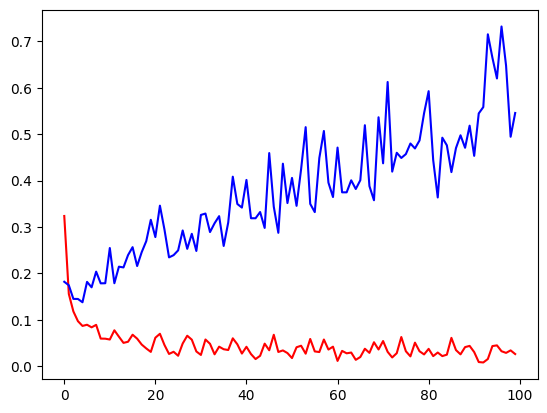

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')

plt.show()

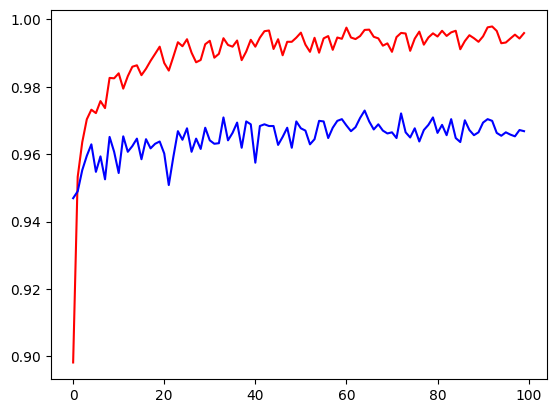

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], color='r')
plt.plot(history.history['val_acc'], color='b')

plt.show()

- 우리 모델의 overfitting이 심한 편